### In this notebook:
#### Functions to eliminate duplicates that happen when the HIPPARCOS and GAIA star catalogs get combined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import astropy.io.ascii as a
import astropy.table
import FunctionsToLoadGaia as load
import FunctionsForGaia as f
from math import pi

#### Extraction RA and Dec (and distance?) from each Tgas file and then combinign them in a large file that will serve to compare GAIA to Hipparcos. Can't use the same combined file of GAIA data we used previously because RA and DEC got turned to X,Y,Z coordinates.

In [2]:
def extractRaDec(filename):
    """ 
    This formula extracts arrays of right ascension and declinaton.
    for each star. Right ascecsion values are set to range from -180º 
    to 180º.
    Both declination and right ascencion arrays are turned from degrees
    to radians, and then they are returned. 
    """
    
    hdu = astropy.io.fits.open(filename)
    table = astropy.table.Table(hdu[1].data)
    dec = (table['dec'].data)*(pi/180) #change degrees to radians.
    
    RA = (table['ra'].data)
    over180 = RA > 180 #want RA values to be from -180 to 180
    RA[over180] = (RA[over180] - 360)
    ra = RA*(pi/180) #change degrees to radians.
    
    return ra, dec

In [3]:
from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')

RA,DEC = np.array([]), np.array([])
for f in filenames:
    ra,dec = extractRaDec(f)
    RA = np.append(RA,ra)
    DEC = np.append(DEC,dec)

GaiaRaDec=astropy.table.Table([RA,DEC], names=['RightAscension','Declination'])
GaiaRa = GaiaRaDec['Righta']

#### The Hipparcos catalog has stars positions saved as X,Y,Z coodrinates. Have to  turn these back into RA and DEC. 

In [4]:
def toCelestianCoordinates (X,Y,Z):
    """
    This function converts X,Y and Z coordinates into
    Right ascenceion, declination and distance for each star of the set
    
    Parameters: 
    ------------------------------------------
    X,Y,Z = Arrays of the x,y and z coordinates for a set of stars.
    
    Returns:
    ------------------------------------------
    RA = array of the right ascencion of each star.
    Dec = array of the declination of each star. 
    Distances = array of the distances to each star. 
    
    """
    ## opposite...
    #c = SkyCoord(RA,DEC,frame='icrs',unit='rad') #use skycoord modules so coordinates are in radians
    #longitude = c.galactic.l.rad
    #latitude = c.galactic.b.rad
    
    #r=Distance*(np.cos(latitude))
    #z=Distance*(np.sin(latitude))
    #y=r*(np.sin(longitude))
    #x=r*(np.cos(longitude))
    
    #NotOppposite 
    #longitude=
    #latitude=
    #Ra= 
    #Dec= 
    #Distance=
    
    return RA, Dec

In [8]:
original = astropy.io.ascii.read('data/starshp.dat', 
                            data_start=33,
                            names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])

HipX = original['X']
HipY = original['Y']
HipZ = original['Z']

#### now to find the duplicates. The following function will determine if the nth star is a duplicate. 
#### having a list of these duplicates I hope it is easier to eliminate them from the master list... 

In [34]:
def findDuplicates(hippRaDec,GaiaRaDec):
    """
    This function will go over the arrrays of stars from the HIPPARCOS and GAIA
    catalogs and determine which stars are duplicates
    
    Parameters:
    ----------------------------------
    GaiaRaDec = array of the RA and DEC of the GAIA catalog
    HipRaDec = array of the RA and DEC of the HIPPARCOS catalog
    
    Returns:
    -----------------------------------
    duplicates = array of the 'positions' of the stars in the GAIA arrays that 
    are repeats of the HIPPARCOS catalog
    """
    
    for i in range(len(original)):
        ora=hippRaDec['RA'][i]
        odec=hippRaDec['DEC'][i]
        distance = (GaiaRADec-ora)**2
        match = distance<threshold
        ioverlap = np.nonzero(match)
        match=[F,F,F,F]
        np.nonzero(match)=[]
    
    
    return duplicates

SyntaxError: can't assign to function call (<ipython-input-34-690c6a806d0e>, line 24)

#### In the next cells, I will create graohs that will help me determine if the above calculations are correct. 
#### If all goes well, a graph of the coordinates will show the hipparcos, Gaia and duplicates in different colors and it will be clear which stars need to be eliminated. 

<IPython.core.display.Javascript object>


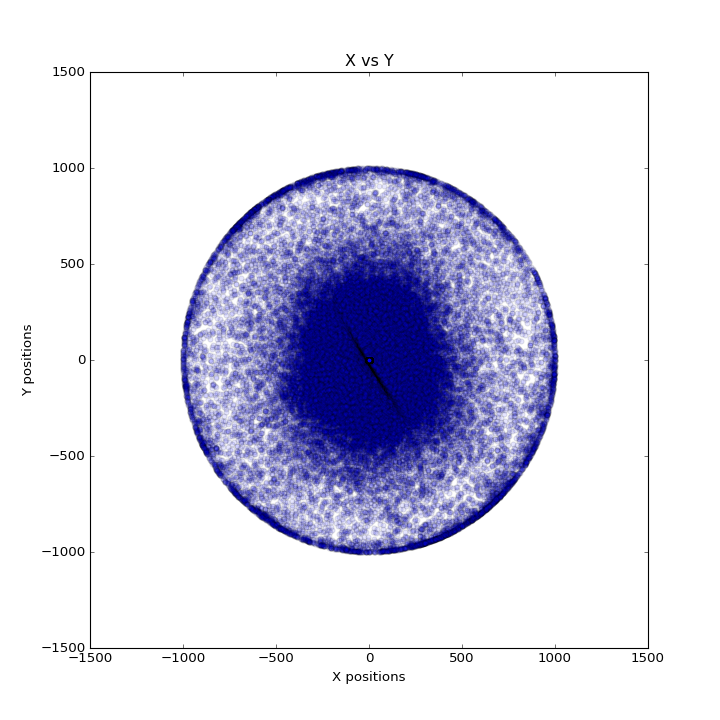

In [10]:
plt.figure(figsize=(9,9))
plt.title('X vs Y')
plt.scatter(HipX,HipY, alpha=0.1)
plt.xlabel('X positions')
plt.ylabel('Y positions')

In [15]:
GaiaRA = GaiaRaDec['RightAscension']
GaiaDEC = GaiaRaDec['Declination']
plt.scatter(GaiaRA,GaiaDEC)

#### The most important thing accomplished above is the list of nth positions that a re duplicates.
#### This very important function below will be transfered to a module and used on MergeHIPandGaia before the two files are merged but after the master list for GAIA has been created.


In [3]:
def eliminateDuplicates(duplicates,Gaia):
    """
    This function eliminates the stars on the GAIA array tht are repeated on the 
    hipparcos catalog
    
    Parameters:
    ------------------------------------
    duplicates = array of the 'positions' of the duplicates in the gaia catalog
    Gaia= 
    
    Returns:
    -------------------------------------
    GaiaNoDuplicates: array of the positions of the stars from the Gaia catalog
    without the stars that HIPPARCOS already mapped
    """
    
    return GaiaNoDuplicates